In [6]:
!pip install graphviz==0.9
!pip install pydot

!apt-get install graphviz

  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.20.1
    Uninstalling graphviz-0.20.1:
      Successfully uninstalled graphviz-0.20.1
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6).
0 upgraded, 0 newly installed, 0 to remove and 16 not upgraded.


In [7]:
import pandas as pd
import numpy as np

uri = "https://gist.githubusercontent.com/guilhermesilveira/e99a526b2e7ccc6c3b70f53db43a87d2/raw/1605fc74aa778066bf2e6695e24d53cf65f2f447/machine-learning-carros-simulacao.csv"
dados = pd.read_csv(uri).drop(columns=["Unnamed: 0"], axis=1)
dados.head()

,preco,vendido,idade_do_modelo,km_por_ano
0,30941.02,1,18,35085.22134
1,40557.96,1,20,12622.05362
2,89627.50,0,12,11440.79806
3,95276.14,0,3,43167.32682
4,117384.68,1,4,12770.11290


In [8]:
# situação horrível de "azar" onde as classes estão ordenadas por padrão

dados_azar = dados.sort_values("vendido", ascending=True)
x_azar = dados_azar[["preco", "idade_do_modelo","km_por_ano"]]
y_azar = dados_azar["vendido"]
dados_azar.head()

,preco,vendido,idade_do_modelo,km_por_ano
4999,74023.29,0,12,24812.80412
5322,84843.49,0,13,23095.63834
5319,83100.27,0,19,36240.72746
5316,87932.13,0,16,32249.56426
5315,77937.01,0,15,28414.50704


In [13]:
from sklearn.model_selection import cross_validate
from sklearn.dummy import DummyClassifier

SEED = 301
np.random.seed(SEED)

modelo = DummyClassifier()
results = cross_validate(modelo, x_azar, y_azar, cv = 10, return_train_score=False)
media = results['test_score'].mean()
desvio_padrao = results['test_score'].std()
print("Accuracy com dummy stratified, 10 = [%.2f, %.2f]" % ((media - 2 * desvio_padrao)*100, (media + 2 * desvio_padrao) * 100))

Accuracy com dummy stratified, 10 = [58.00, 58.00]


In [14]:
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier

SEED = 301
np.random.seed(SEED)

modelo = DecisionTreeClassifier(max_depth=2)
results = cross_validate(modelo, x_azar, y_azar, cv = 10, return_train_score=False)
media = results['test_score'].mean()
desvio_padrao = results['test_score'].std()
print("Accuracy com cross validation, 10 = [%.2f, %.2f]" % ((media - 2 * desvio_padrao)*100, (media + 2 * desvio_padrao) * 100))

Accuracy com cross validation, 10 = [73.83, 77.73]


In [15]:
# gerando dados elatorios de modelo de carro para simulacao de agrupamento ao usar nosso estimador

np.random.seed(SEED)
dados['modelo'] = dados.idade_do_modelo + np.random.randint(-2, 3, size=10000)
dados.modelo = dados.modelo + abs(dados.modelo.min()) + 1
dados.head()

,preco,vendido,idade_do_modelo,km_por_ano,modelo
0,30941.02,1,18,35085.22134,18
1,40557.96,1,20,12622.05362,24
2,89627.50,0,12,11440.79806,14
3,95276.14,0,3,43167.32682,6
4,117384.68,1,4,12770.11290,5


In [16]:
def imprime_resultados(results):
  media = results['test_score'].mean() * 100
  desvio = results['test_score'].std() * 100
  print("Accuracy médio %.2f" % media)
  print("Intervalo [%.2f, %.2f]" % (media - 2 * desvio, media + 2 * desvio))

In [17]:
# GroupKFold para analisar como o modelo se comporta com novos grupos

from sklearn.model_selection import GroupKFold

SEED = 301
np.random.seed(SEED)

cv = GroupKFold(n_splits = 10)
modelo = DecisionTreeClassifier(max_depth=2)
results = cross_validate(modelo, x_azar, y_azar, cv = cv, groups = dados.modelo, return_train_score=False)
imprime_resultados(results)

Accuracy médio 75.78
Intervalo [73.67, 77.90]


In [ ]:
# GroupKFold em um pipeline com StandardScaler e SVC

from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

SEED = 301
np.random.seed(SEED)

scaler = StandardScaler()
modelo = SVC()

pipeline = Pipeline([('transformacao',scaler), ('estimador',modelo)])

cv = GroupKFold(n_splits = 10)
results = cross_validate(pipeline, x_azar, y_azar, cv = cv, groups = dados.modelo, return_train_score=False)
imprime_resultados(results)

Accuracy médio 76.68
Intervalo [74.28, 79.08]


In [ ]:
# GroupKFold para analisar como o modelo se comporta com novos grupos

from sklearn.model_selection import GroupKFold

SEED = 301
np.random.seed(SEED)

cv = GroupKFold(n_splits = 10)
modelo = DecisionTreeClassifier(max_depth=3)
results = cross_validate(modelo, x_azar, y_azar, cv = cv, groups = dados.modelo, return_train_score=False)
imprime_resultados(results)

Accuracy médio 78.67
Intervalo [76.40, 80.94]


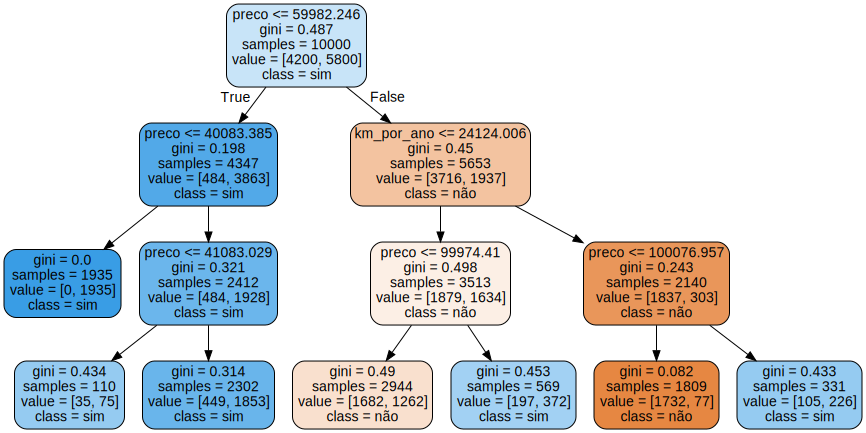

In [ ]:
from sklearn.tree import export_graphviz
import graphviz

modelo.fit(x_azar,y_azar)
features = x_azar.columns
dot_data = export_graphviz(modelo, out_file = None, filled = True, rounded = True,
                           class_names = ["não","sim"],
                           feature_names = features)
graph = graphviz.Source(dot_data)
graph

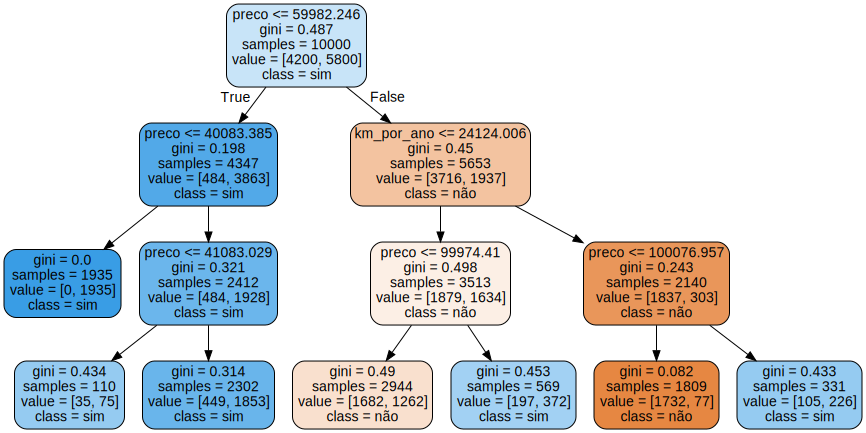

In [ ]:
from sklearn.tree import export_graphviz
import graphviz

modelo.fit(x_azar,y_azar)
features = x_azar.columns
dot_data = export_graphviz(modelo, out_file = None, filled = True, rounded = True,
                           class_names = ["não","sim"],
                           feature_names = features)
graph = graphviz.Source(dot_data)
graph

In [ ]:
# GroupKFold para analisar como o modelo se comporta com novos grupos

from sklearn.model_selection import GroupKFold

SEED = 301
np.random.seed(SEED)

cv = GroupKFold(n_splits = 10)
modelo = DecisionTreeClassifier(max_depth=10)
results = cross_validate(modelo, x_azar, y_azar, cv = cv, groups = dados.modelo, return_train_score=False)
imprime_resultados(results)

Accuracy médio 77.19
Intervalo [75.26, 79.13]


## Testando Parâmetros

In [ ]:
def roda_arvore_decisao(max_depth):

  SEED = 301
  np.random.seed(SEED)

  cv = GroupKFold(n_splits = 10)
  modelo = DecisionTreeClassifier(max_depth=max_depth)
  results = cross_validate(modelo, x_azar, y_azar, cv = cv, groups = dados.modelo, return_train_score=True)
  media_teste = results["test_score"].mean()*100
  media_treino = results["train_score"].mean()*100
  print(f"max_depth: {max_depth} \t média teste: {media_teste:0.2f} \t media treino:{media_treino:0.2f}")
  tabela = [max_depth, media_teste , media_treino]
  return tabela

resultados = [roda_arvore_decisao(i) for i in range(1,33)]
resultados = pd.DataFrame(resultados, columns =["max_depth","test","train"])

max_depth: 1 	 média teste: 75.78 	 media treino:75.79
max_depth: 2 	 média teste: 75.78 	 media treino:75.79
max_depth: 3 	 média teste: 78.67 	 media treino:78.75
max_depth: 4 	 média teste: 78.63 	 media treino:78.79
max_depth: 5 	 média teste: 78.56 	 media treino:78.94
max_depth: 6 	 média teste: 78.12 	 media treino:79.17
max_depth: 7 	 média teste: 77.96 	 media treino:79.50
max_depth: 8 	 média teste: 77.86 	 media treino:79.89
max_depth: 9 	 média teste: 77.38 	 media treino:80.46
max_depth: 10 	 média teste: 77.19 	 media treino:81.16
max_depth: 11 	 média teste: 76.97 	 media treino:82.03
max_depth: 12 	 média teste: 76.49 	 media treino:82.89
max_depth: 13 	 média teste: 75.81 	 media treino:83.95
max_depth: 14 	 média teste: 75.66 	 media treino:85.03
max_depth: 15 	 média teste: 75.16 	 media treino:86.14
max_depth: 16 	 média teste: 75.11 	 media treino:87.19
max_depth: 17 	 média teste: 74.74 	 media treino:88.31
max_depth: 18 	 média teste: 74.33 	 media treino:89.26
m

In [ ]:
resultados.head()

,max_depth,test,train
0,1,75.784219,75.791169
1,2,75.784219,75.791169
2,3,78.672633,78.750993
3,4,78.632803,78.787628
4,5,78.555912,78.941007


## OVERFIT - Ficou perfeito para o treino, mas nem tanto para o teste

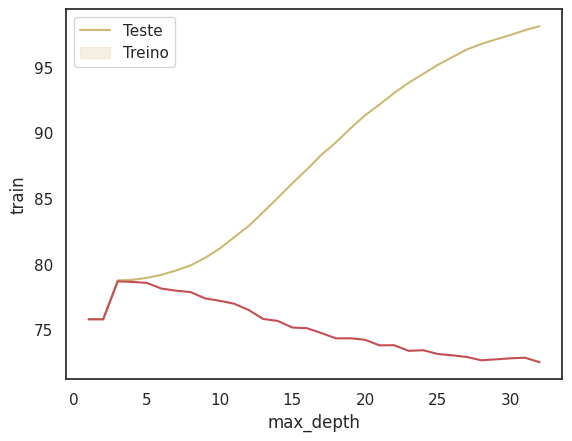

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(data = resultados, x = "max_depth", y = "train", color = "y")
sns.lineplot(data = resultados, x = "max_depth", y = "test", color = "r")
plt.legend(["Teste","Treino"])

In [ ]:
resultados.sort_values("test",ascending = False).head()

,max_depth,test,train
2,3,78.672633,78.750993
3,4,78.632803,78.787628
4,5,78.555912,78.941007
5,6,78.123266,79.170115
6,7,77.963185,79.496806


## Explorando Hiperparâmetros em duas dimensões

In [ ]:
def roda_arvore_decisao(max_depth,min_samples_leaf):

  SEED = 301
  np.random.seed(SEED)

  cv = GroupKFold(n_splits = 10)
  modelo = DecisionTreeClassifier(max_depth=max_depth,min_samples_leaf=min_samples_leaf)
  results = cross_validate(modelo, x_azar, y_azar, cv = cv, groups = dados.modelo, return_train_score=True)
  media_teste = results["test_score"].mean()*100
  media_treino = results["train_score"].mean()*100
  print(f"max_depth: {max_depth} \t mean_samples_leaf: {min_samples_leaf} \t média teste: {media_teste:0.2f} \t media treino:{media_treino:0.2f}")
  tabela = [max_depth,min_samples_leaf,  media_treino , media_teste]
  return tabela

def busca():
  resultados = []
  for i in range(1,33):
    for j in [32,64,128,256]:
      resultados.append(roda_arvore_decisao(i, j))
  resultados = pd.DataFrame(resultados, columns =["max_depth","min_samples_leaf","train","test"])

In [ ]:
resultados.sort_values("test", ascending = False).head()

,max_depth,test,train
2,3,78.672633,78.750993
3,4,78.632803,78.787628
4,5,78.555912,78.941007
5,6,78.123266,79.170115
6,7,77.963185,79.496806


In [ ]:
corr = resultados.corr()

In [ ]:
import plotly.express as px

plt.figure(figsize = (14,10))
fig = px.imshow(resultados.corr(), text_auto = True)
fig.show()

<Figure size 1400x1000 with 0 Axes>

<Axes: >

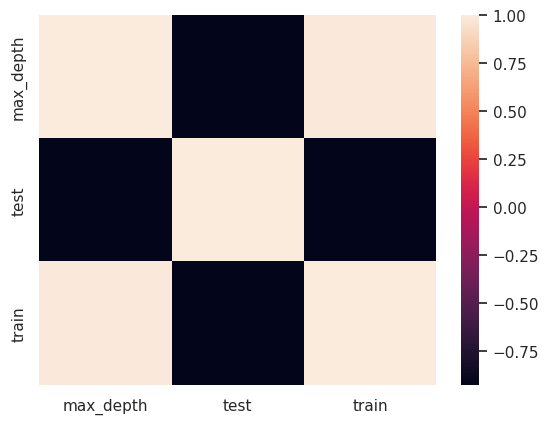

In [ ]:
sns.heatmap(resultados.corr())

array([[<Axes: xlabel='max_depth', ylabel='max_depth'>,
        <Axes: xlabel='test', ylabel='max_depth'>,
        <Axes: xlabel='train', ylabel='max_depth'>],
       [<Axes: xlabel='max_depth', ylabel='test'>,
        <Axes: xlabel='test', ylabel='test'>,
        <Axes: xlabel='train', ylabel='test'>],
       [<Axes: xlabel='max_depth', ylabel='train'>,
        <Axes: xlabel='test', ylabel='train'>,
        <Axes: xlabel='train', ylabel='train'>]], dtype=object)

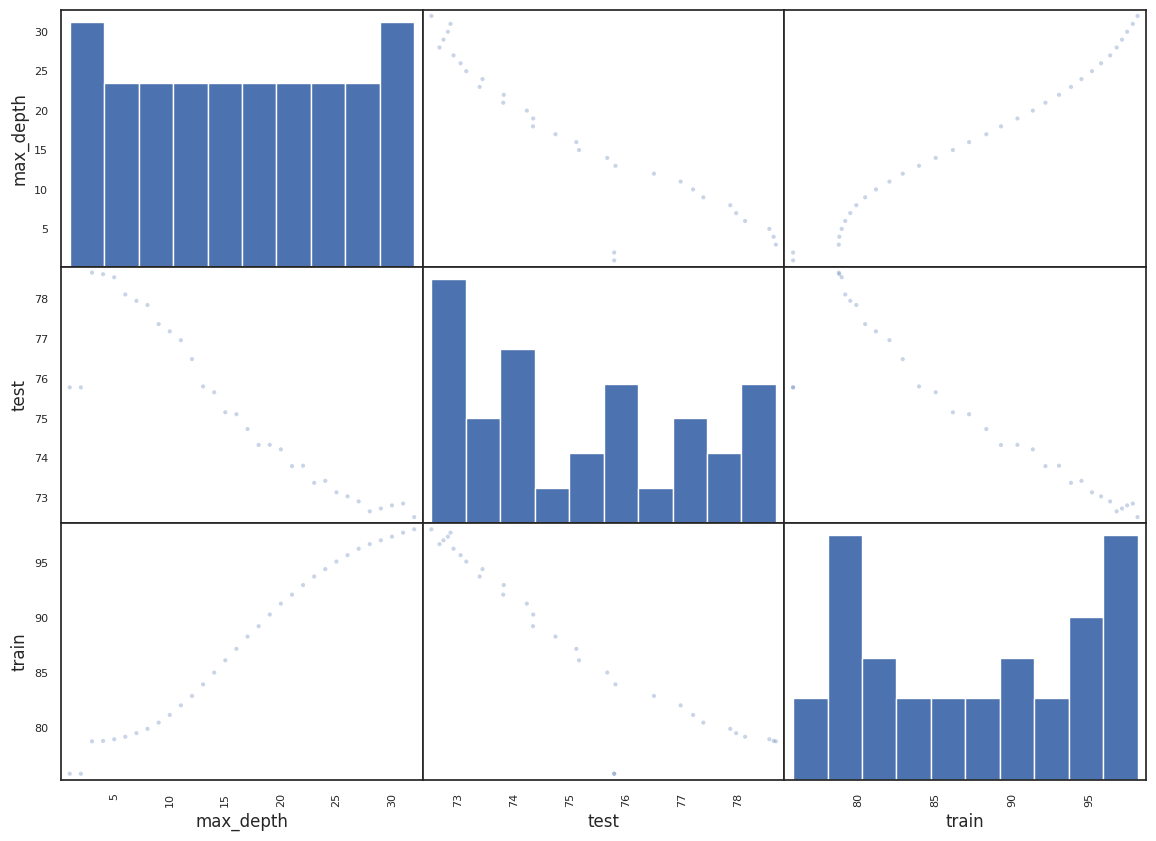

In [ ]:
pd.plotting.scatter_matrix(resultados, figsize = (14,10), alpha = 0.3)

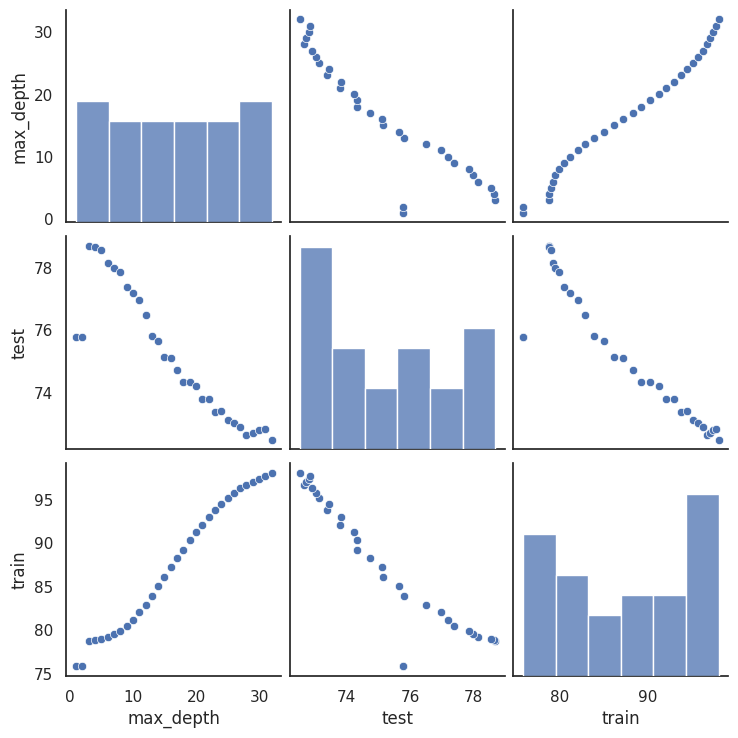

In [ ]:
sns.pairplot(resultados)

<Axes: >

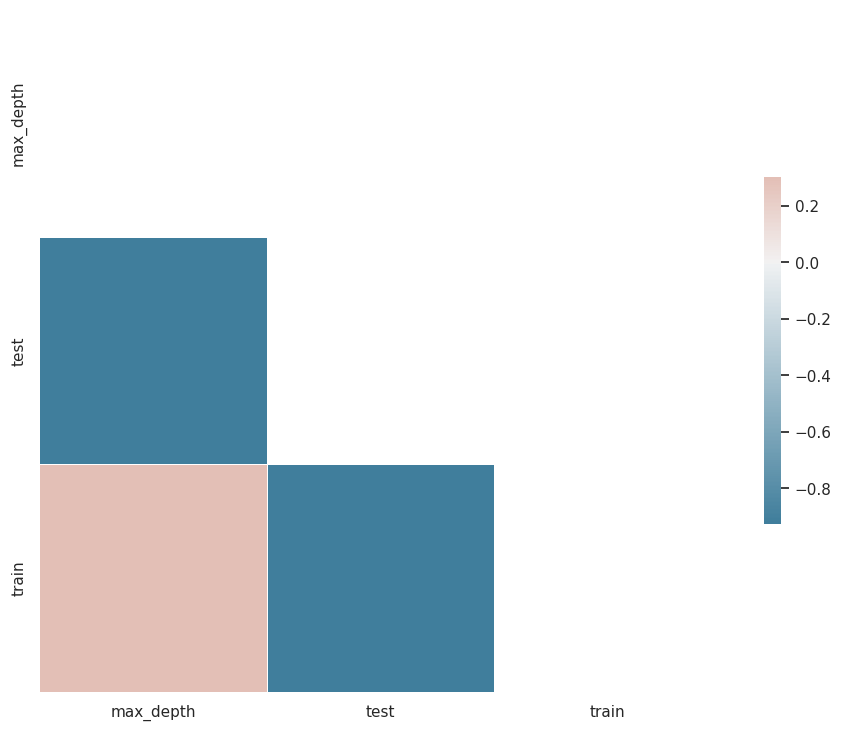

In [ ]:
corr = resultados.corr()
sns.set_theme(style="white")

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
def busca():
  resultados = []
  for i in range(1,33):
    for j in [128, 192,256,512]:
      resultados.append(roda_arvore_decisao(i, j))
  resultados = pd.DataFrame(resultados, columns =["max_depth","min_samples_leaf","train","test"])
  return resultados

In [ ]:
resultados = busca()

max_depth: 1 	 mean_samples_leaf: 128 	 média teste: 75.78 	 media treino:75.79
max_depth: 1 	 mean_samples_leaf: 192 	 média teste: 75.78 	 media treino:75.79
max_depth: 1 	 mean_samples_leaf: 256 	 média teste: 75.78 	 media treino:75.79
max_depth: 1 	 mean_samples_leaf: 512 	 média teste: 75.78 	 media treino:75.79
max_depth: 2 	 mean_samples_leaf: 128 	 média teste: 75.78 	 media treino:75.79
max_depth: 2 	 mean_samples_leaf: 192 	 média teste: 75.78 	 media treino:75.79
max_depth: 2 	 mean_samples_leaf: 256 	 média teste: 75.78 	 media treino:75.79
max_depth: 2 	 mean_samples_leaf: 512 	 média teste: 75.78 	 media treino:75.79
max_depth: 3 	 mean_samples_leaf: 128 	 média teste: 78.67 	 media treino:78.75
max_depth: 3 	 mean_samples_leaf: 192 	 média teste: 78.67 	 media treino:78.75
max_depth: 3 	 mean_samples_leaf: 256 	 média teste: 78.67 	 media treino:78.75
max_depth: 3 	 mean_samples_leaf: 512 	 média teste: 77.50 	 media treino:77.53
max_depth: 4 	 mean_samples_leaf: 128 	 

In [ ]:
resultados.sort_values("test", ascending = False).head()

,max_depth,min_samples_leaf,train,test
13,4,192,78.750993,78.672633
8,3,128,78.750993,78.672633
9,3,192,78.750993,78.672633
10,3,256,78.750993,78.672633
14,4,256,78.750993,78.672633


<Axes: >

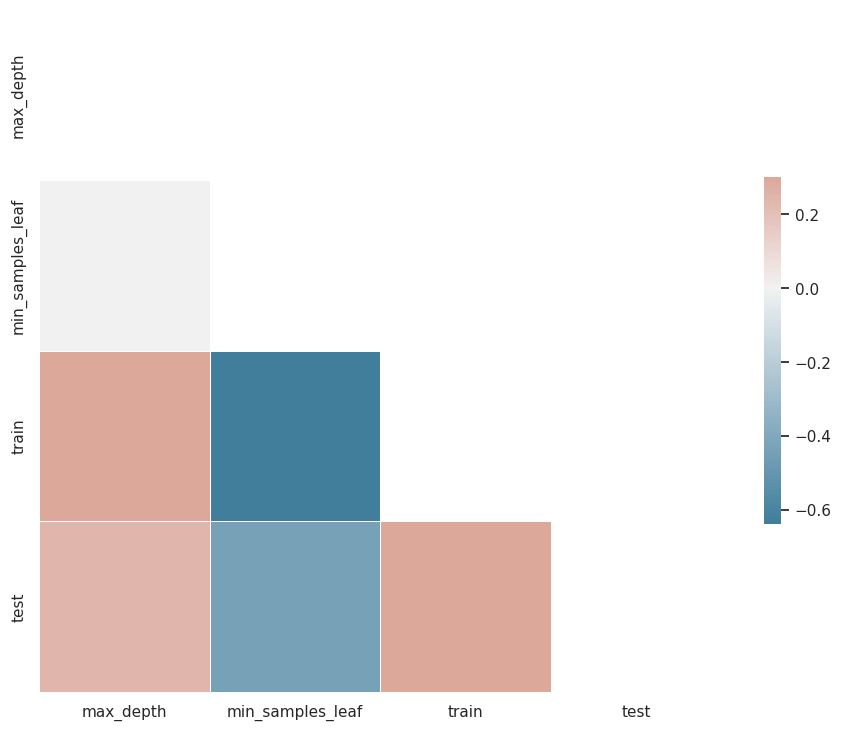

In [ ]:
corr = resultados.corr()
sns.set_theme(style="white")

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## Explorando Hiperparâmetros em três dimensões

In [11]:
def roda_arvore_decisao(max_depth,min_samples_leaf,min_samples_split):

  SEED = 301
  np.random.seed(SEED)

  cv = GroupKFold(n_splits = 10)
  modelo = DecisionTreeClassifier(max_depth=max_depth,min_samples_leaf=min_samples_leaf, min_samples_split=min_samples_split)
  results = cross_validate(modelo, x_azar, y_azar, cv = cv, groups = dados.modelo, return_train_score=True)
  fit_time = results["fit_time"].mean()
  score_time = results["score_time"].mean()
  media_teste = results["test_score"].mean()*100
  media_treino = results["train_score"].mean()*100
  tabela = [max_depth,min_samples_leaf, min_samples_split,  media_treino , media_teste, fit_time, score_time]
  return tabela

def busca():
  resultados = []
  for i in range(1,33):
    for j in [32, 64 , 128, 256]:
      for k in [32, 64 , 128, 256]:
        resultados.append(roda_arvore_decisao(i, j, k))
  resultados = pd.DataFrame(resultados, columns =["max_depth","min_samples_leaf","min_samples_split","train","test","fit_time","score_time"])
  return resultados

In [ ]:
resultados = busca()

In [ ]:
resultados.sort_values("test", ascending = False).head()

,max_depth,min_samples_leaf,min_samples_split,train,test,fit_time,score_time
63,4,256,256,78.750993,78.672633,0.012525,0.002266
48,4,32,32,78.750993,78.672633,0.014304,0.002636
34,3,32,128,78.750993,78.672633,0.016223,0.003456
35,3,32,256,78.750993,78.672633,0.016770,0.003555
36,3,64,32,78.750993,78.672633,0.016703,0.003850


<Axes: >

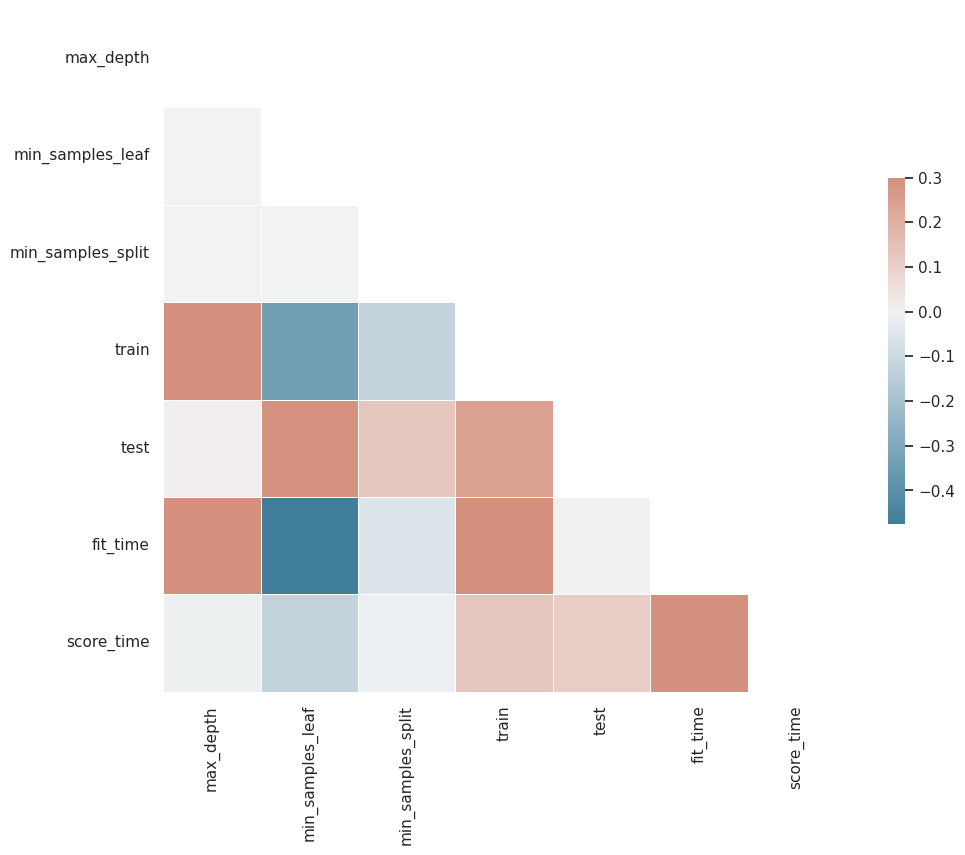

In [ ]:
corr = resultados.corr()
sns.set_theme(style="white")

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

#Explorando espaço de hiperpaâmetros com GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

SEED = 301
np.random.seed(SEED)

espaco_de_parametros = { "max_depth" : [3,5],
                         "min_samples_split" : [32,64,128],
                         "min_samples_leaf" : [32,64,128],
                         "criterion" : ["gini","entropy"]}

busca = GridSearchCV(DecisionTreeClassifier(),
                     espaco_de_parametros,
                     cv = GroupKFold(n_splits = 10))
busca.fit(x_azar,y_azar, groups =  dados.modelo)
resultados = pd.DataFrame(busca.cv_results_)
resultados.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.011613,0.001140,0.002295,0.000388,gini,3,32,32,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.804757,...,0.78408,0.783181,0.797809,0.762866,0.781818,0.77551,0.790262,0.786726,0.011361,1
1,0.011019,0.000152,0.002118,0.000119,gini,3,32,64,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.804757,...,0.78408,0.783181,0.797809,0.762866,0.781818,0.77551,0.790262,0.786726,0.011361,1
2,0.011531,0.001258,0.002409,0.000435,gini,3,32,128,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.804757,...,0.78408,0.783181,0.797809,0.762866,0.781818,0.77551,0.790262,0.786726,0.011361,1
3,0.011904,0.002042,0.002344,0.000404,gini,3,64,32,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.804757,...,0.78408,0.783181,0.797809,0.762866,0.781818,0.77551,0.790262,0.786726,0.011361,1
4,0.011464,0.000859,0.002615,0.001111,gini,3,64,64,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.804757,...,0.78408,0.783181,0.797809,0.762866,0.781818,0.77551,0.790262,0.786726,0.011361,1


In [ ]:
print(busca.best_params_)
print(busca.best_score_*100)
melhor = busca.best_estimator_
melhor

{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 32, 'min_samples_split': 32}
78.67263337284332


DecisionTreeClassifier(max_depth=3, min_samples_leaf=32, min_samples_split=32)

In [ ]:
from sklearn.metrics import accuracy_score

# Se usar o predict estaremos sendo muito otimistas em relação a realidade (Evitar essa abordagem)
predisoes = melhor.predict(x_azar)
acuracy = accuracy_score(predisoes,y_azar)*100
print(f"A acurácia do modelo foi:{acuracy:0.2f}")

A acurácia do modelo foi:78.75


## Nested Cross-Validation



In [ ]:
from sklearn.model_selection import cross_val_score

#score =  cross_val_score(busca,x_azar,y_azar, cv = GroupKFold(n_splits = 10), groups = dados.modelo)

## Infelizmente o pandas não suporta o nested groupkfold, por conta disso, usaremos o kfold normal

In [ ]:
from sklearn.model_selection import GridSearchCV

SEED = 301
np.random.seed(SEED)

espaco_de_parametros = { "max_depth" : [3,5],
                         "min_samples_split" : [32,64,128],
                         "min_samples_leaf" : [32,64,128],
                         "criterion" : ["gini","entropy"]}

busca = GridSearchCV(DecisionTreeClassifier(),
                     espaco_de_parametros,
                     cv = KFold(n_splits = 10, shuffle = True))
busca.fit(x_azar,y_azar, groups =  dados.modelo)
resultados = pd.DataFrame(busca.cv_results_)
resultados.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.055104,0.011058,0.012852,0.005417,gini,3,32,32,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.767,...,0.774,0.813,0.792,0.796,0.79,0.78,0.779,0.787,0.013229,1
1,0.044625,0.013922,0.008378,0.006365,gini,3,32,64,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.767,...,0.774,0.813,0.792,0.796,0.79,0.78,0.779,0.787,0.013229,1
2,0.030082,0.010531,0.007415,0.005405,gini,3,32,128,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.767,...,0.774,0.813,0.792,0.796,0.79,0.78,0.779,0.787,0.013229,1
3,0.024130,0.006630,0.005142,0.002511,gini,3,64,32,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.767,...,0.774,0.813,0.792,0.796,0.79,0.78,0.779,0.787,0.013229,1
4,0.035021,0.011638,0.008334,0.004309,gini,3,64,64,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.767,...,0.774,0.813,0.792,0.796,0.79,0.78,0.779,0.787,0.013229,1


In [ ]:
from sklearn.model_selection import KFold

score =  cross_val_score(busca,x_azar,y_azar, cv = KFold(n_splits = 5,shuffle = True))
score

array([0.77  , 0.79  , 0.7875, 0.7845, 0.8025])

In [28]:
def imprime_score(scores):
  media = scores.mean() * 100
  desvio = scores.std() * 100
  print("Accuracy médio %.2f" % media)
  print("Intervalo [%.2f, %.2f]" % (media - 2 * desvio, media + 2 * desvio))

In [ ]:
imprime_score(score)

Accuracy médio 78.69
Intervalo [76.60, 80.78]


In [ ]:
melhor = busca.best_estimator_
melhor

DecisionTreeClassifier(max_depth=3, min_samples_leaf=32, min_samples_split=32)

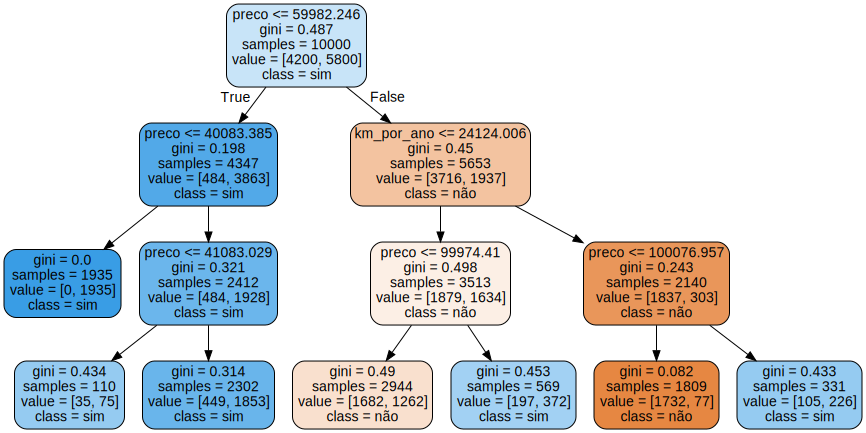

In [ ]:
from sklearn.tree import export_graphviz
import graphviz

melhor.fit(x_azar,y_azar)
features = x_azar.columns
dot_data = export_graphviz(melhor, out_file = None, filled = True, rounded = True,
                           class_names = ["não","sim"],
                           feature_names = features)
graph = graphviz.Source(dot_data)
graph

#Explorando aleatoriamente

In [ ]:
# Busca aleatória

from sklearn.model_selection import RandomizedSearchCV,KFold

SEED = 301
np.random.seed(SEED)

espaco_de_parametros = { "max_depth" : [3,5],
                         "min_samples_split" : [32,64,128],
                         "min_samples_leaf" : [32,64,128],
                         "criterion" : ["gini","entropy"]}

busca = RandomizedSearchCV(DecisionTreeClassifier(),
                          espaco_de_parametros,
                          n_iter = 16,
                          cv = KFold(n_splits = 10, shuffle = True))
busca.fit(x_azar,y_azar, groups =  dados.modelo)
resultados = pd.DataFrame(busca.cv_results_)
resultados.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,param_min_samples_leaf,param_max_depth,param_criterion,params,split0_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.015921,0.001923,0.002423,0.000295,128,128,5,gini,"{'min_samples_split': 128, 'min_samples_leaf':...",0.770,...,0.793,0.793,0.784,0.796,0.774,0.773,0.780,0.7851,0.011247,10
1,0.011696,0.001198,0.002251,0.000161,64,32,3,gini,"{'min_samples_split': 64, 'min_samples_leaf': ...",0.770,...,0.799,0.793,0.784,0.796,0.775,0.783,0.780,0.7868,0.010971,1
2,0.011175,0.000369,0.002242,0.000208,64,128,3,gini,"{'min_samples_split': 64, 'min_samples_leaf': ...",0.770,...,0.799,0.793,0.784,0.796,0.775,0.783,0.780,0.7868,0.010971,1
3,0.018809,0.000769,0.002566,0.000289,32,64,5,entropy,"{'min_samples_split': 32, 'min_samples_leaf': ...",0.771,...,0.797,0.793,0.784,0.796,0.775,0.773,0.774,0.7851,0.011794,10
4,0.019516,0.001589,0.002889,0.000640,64,64,5,entropy,"{'min_samples_split': 64, 'min_samples_leaf': ...",0.771,...,0.797,0.793,0.784,0.796,0.775,0.773,0.774,0.7851,0.011794,10


In [ ]:
score =  cross_val_score(busca,x_azar,y_azar, cv = KFold(n_splits = 5,shuffle = True))
print(score)
imprime_score(score)

[0.79   0.7835 0.79   0.783  0.7885]
Accuracy médio 78.70
Intervalo [78.08, 79.32]


In [ ]:
melhor = busca.best_estimator_
print(melhor)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=32, min_samples_split=64)


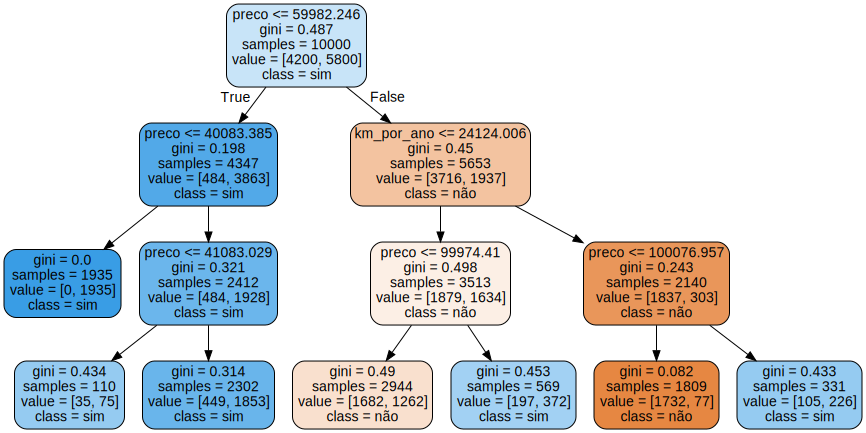

In [ ]:
melhor.fit(x_azar,y_azar)
features = x_azar.columns
dot_data = export_graphviz(melhor, out_file = None, filled = True, rounded = True,
                           class_names = ["não","sim"],
                           feature_names = features)
graph = graphviz.Source(dot_data)
graph

## Customizando espaço de parâmetro

In [ ]:
!pip install scipy

In [ ]:
# Busca aleatória
from scipy.stats import randint

SEED = 301
np.random.seed(SEED)

espaco_de_parametros = { "max_depth" : [3,5,10,15,20,30,None],
                         "min_samples_split" : randint(32,128),
                         "min_samples_leaf" : randint(32,128),
                         "criterion" : ["gini","entropy"]}

busca = RandomizedSearchCV(DecisionTreeClassifier(),
                          espaco_de_parametros,
                          n_iter = 16,
                          cv = KFold(n_splits = 10, shuffle = True))
busca.fit(x_azar,y_azar, groups =  dados.modelo)
resultados = pd.DataFrame(busca.cv_results_)
resultados.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.017972,0.006318,0.002935,0.000723,entropy,3,71,100,"{'criterion': 'entropy', 'max_depth': 3, 'min_...",0.794,...,0.778,0.801,0.779,0.791,0.786,0.788,0.780,0.7870,0.006797,1
1,0.026446,0.007654,0.004575,0.004313,gini,15,93,111,"{'criterion': 'gini', 'max_depth': 15, 'min_sa...",0.782,...,0.773,0.790,0.774,0.792,0.768,0.784,0.774,0.7788,0.008577,12
2,0.028295,0.003264,0.005225,0.002980,gini,20,124,88,"{'criterion': 'gini', 'max_depth': 20, 'min_sa...",0.782,...,0.774,0.791,0.779,0.793,0.775,0.776,0.779,0.7804,0.007513,4
3,0.037404,0.008654,0.004014,0.000121,gini,None,46,62,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.795,...,0.764,0.795,0.765,0.778,0.763,0.766,0.768,0.7746,0.011732,16
4,0.032593,0.011762,0.003942,0.000217,gini,15,126,84,"{'criterion': 'gini', 'max_depth': 15, 'min_sa...",0.782,...,0.774,0.791,0.779,0.793,0.775,0.768,0.782,0.7800,0.008210,7


In [ ]:
score =  cross_val_score(busca,x_azar,y_azar, cv = KFold(n_splits = 5,shuffle = True))
print(score)
imprime_score(score)

[0.7815 0.7935 0.7795 0.7805 0.7985]
Accuracy médio 78.67
Intervalo [77.11, 80.23]


In [ ]:
melhor = busca.best_estimator_
print(melhor)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=71,
                       min_samples_split=100)


In [ ]:
resultados_ordenados_media = resultados.sort_values("mean_test_score", ascending = False)
for indice, linha in resultados_ordenados_media.iterrows():
  print("%.3f +- (%.3f) %s" % (linha.mean_test_score, linha.std_test_score*2, linha.params))

0.787 +- (0.019) {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 71, 'min_samples_split': 100}
0.787 +- (0.019) {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 69, 'min_samples_split': 124}
0.787 +- (0.019) {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 63, 'min_samples_split': 88}
0.787 +- (0.019) {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 67, 'min_samples_split': 76}
0.787 +- (0.019) {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 65, 'min_samples_split': 50}
0.787 +- (0.019) {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 120, 'min_samples_split': 46}
0.787 +- (0.019) {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 53, 'min_samples_split': 111}
0.787 +- (0.019) {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 106, 'min_samples_split': 108}
0.784 +- (0.028) {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 101, 'min_samples_split': 95}
0.784 +- (0.028) {'criterion': 'gini', 'ma

## Uma exploração mais a fundo de maneira aleatória

In [ ]:
SEED = 301
np.random.seed(SEED)

espaco_de_parametros = { "max_depth" : [3,5,10,15,20,30,None],
                         "min_samples_split" : randint(32,128),
                         "min_samples_leaf" : randint(32,128),
                         "criterion" : ["gini","entropy"]}

busca = RandomizedSearchCV(DecisionTreeClassifier(),
                          espaco_de_parametros,
                          n_iter = 64,
                          cv = KFold(n_splits = 10, shuffle = True))
busca.fit(x_azar,y_azar, groups =  dados.modelo)
resultados = pd.DataFrame(busca.cv_results_)
resultados.head()

score =  cross_val_score(busca,x_azar,y_azar, cv = KFold(n_splits = 5,shuffle = True))
print(score)
imprime_score(score)

melhor = busca.best_estimator_
print(melhor)

[0.7875 0.782  0.782  0.786  0.788 ]
Accuracy médio 78.51
Intervalo [77.99, 79.03]
DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=71,
                       min_samples_split=100)


# Comparando GridSearchCV com RandomizedSearch (1 comparação)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import time

SEED = 301
np.random.seed(SEED)

espaco_de_parametros = { "n_estimators":[10 , 100],
                         "max_depth" : [3,5],
                         "min_samples_split" : [32,64,128],
                         "min_samples_leaf" : [32,64,128],
                         "bootstrap": [True,False],
                         "criterion" : ["gini","entropy"]}

tic = time.time()
busca = GridSearchCV(RandomForestClassifier(),
                     espaco_de_parametros,
                     cv = KFold(n_splits = 10, shuffle = True))
busca.fit(x_azar,y_azar, groups =  dados.modelo)
tac = time.time()
tempo = tac-tic
print("Tempo %.2f segundo" % tempo)

resultados = pd.DataFrame(busca.cv_results_)
resultados.head()

Tempo 513.85 segundo


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.085876,0.007025,0.007382,0.002051,True,gini,3,32,32,10,...,0.755,0.762,0.734,0.795,0.750,0.765,0.734,0.7560,0.018847,142
1,0.678364,0.296000,0.021401,0.010789,True,gini,3,32,32,100,...,0.754,0.805,0.774,0.757,0.773,0.764,0.759,0.7701,0.015890,108
2,0.048123,0.002177,0.004164,0.000621,True,gini,3,32,64,10,...,0.755,0.786,0.783,0.770,0.749,0.752,0.754,0.7599,0.014976,137
3,0.449477,0.009157,0.014820,0.001290,True,gini,3,32,64,100,...,0.753,0.806,0.785,0.796,0.775,0.766,0.759,0.7754,0.017333,47
4,0.048281,0.002720,0.004054,0.000633,True,gini,3,32,128,10,...,0.772,0.760,0.782,0.779,0.775,0.748,0.765,0.7674,0.013618,117


In [ ]:
resultados_ordenados_media = resultados.sort_values("mean_test_score", ascending = False)
for indice, linha in resultados_ordenados_media[:5].iterrows():
  print("%.3f +- (%.3f) %s" % (linha.mean_test_score, linha.std_test_score*2, linha.params))

0.784 +- (0.029) {'bootstrap': False, 'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 32, 'min_samples_split': 64, 'n_estimators': 10}
0.780 +- (0.030) {'bootstrap': True, 'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 32, 'min_samples_split': 32, 'n_estimators': 10}
0.780 +- (0.028) {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 32, 'min_samples_split': 32, 'n_estimators': 10}
0.779 +- (0.030) {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 128, 'min_samples_split': 64, 'n_estimators': 10}
0.779 +- (0.030) {'bootstrap': False, 'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 32, 'min_samples_split': 32, 'n_estimators': 10}


In [ ]:
#Demora pra caramba
tic = time.time()
score =  cross_val_score(busca,x_azar,y_azar, cv = KFold(n_splits = 5,shuffle = True))
print(score)
imprime_score(score)
tac = time.time()
tempo = tac-tic
print("Tempo: %0.2f segundos "%tempo)

In [ ]:
#Randomized
SEED = 301
np.random.seed(SEED)

espaco_de_parametros = { "n_estimators":[10 , 100],
                         "max_depth" : [3,5],
                         "min_samples_split" : [32,64,128],
                         "min_samples_leaf" : [32,64,128],
                         "bootstrap": [True,False],
                         "criterion" : ["gini","entropy"]}

tic = time.time()
busca = RandomizedSearchCV(RandomForestClassifier(),
                          espaco_de_parametros,
                          n_iter = 20,
                          cv = KFold(n_splits = 10, shuffle = True))
busca.fit(x_azar,y_azar, groups =  dados.modelo)
tac = time.time()
tempo = tac-tic
print("Tempo: %0.2f segundos "%tempo)
resultados = pd.DataFrame(busca.cv_results_)
resultados.head()

Tempo: 85.73 segundos 


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_depth,param_criterion,param_bootstrap,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.794143,0.552117,0.021828,0.011222,100,32,128,3,entropy,True,...,0.768,0.775,0.810,0.791,0.767,0.747,0.769,0.7749,0.015776,6
1,0.062318,0.003354,0.004764,0.001405,10,32,128,5,entropy,True,...,0.781,0.780,0.794,0.791,0.767,0.748,0.767,0.7748,0.013310,7
2,0.751958,0.149531,0.019531,0.003899,100,32,32,5,entropy,True,...,0.765,0.777,0.813,0.791,0.774,0.750,0.769,0.7761,0.015921,1
3,0.047024,0.002156,0.003806,0.000136,10,128,32,3,gini,True,...,0.768,0.775,0.804,0.791,0.773,0.742,0.735,0.7659,0.020569,15
4,0.063112,0.005994,0.004168,0.000514,10,64,32,3,entropy,False,...,0.783,0.771,0.796,0.751,0.768,0.747,0.768,0.7702,0.013556,13


In [ ]:
resultados_ordenados_media = resultados.sort_values("mean_test_score", ascending = False)
for indice, linha in resultados_ordenados_media[:5].iterrows():
  print("%.3f +- (%.3f) %s" % (linha.mean_test_score, linha.std_test_score*2, linha.params))

0.776 +- (0.032) {'n_estimators': 100, 'min_samples_split': 32, 'min_samples_leaf': 32, 'max_depth': 5, 'criterion': 'entropy', 'bootstrap': True}
0.776 +- (0.029) {'n_estimators': 100, 'min_samples_split': 64, 'min_samples_leaf': 32, 'max_depth': 5, 'criterion': 'entropy', 'bootstrap': True}
0.776 +- (0.033) {'n_estimators': 100, 'min_samples_split': 32, 'min_samples_leaf': 32, 'max_depth': 5, 'criterion': 'gini', 'bootstrap': False}
0.776 +- (0.027) {'n_estimators': 10, 'min_samples_split': 32, 'min_samples_leaf': 32, 'max_depth': 5, 'criterion': 'gini', 'bootstrap': True}
0.775 +- (0.032) {'n_estimators': 100, 'min_samples_split': 32, 'min_samples_leaf': 128, 'max_depth': 3, 'criterion': 'gini', 'bootstrap': True}


In [ ]:
#Demora pra caramba
tic = time.time()
score =  cross_val_score(busca,x_azar,y_azar, cv = KFold(n_splits = 5,shuffle = True))
print(score)
imprime_score(score)
tac = time.time()
tempo = tac-tic
print("Tempo: %0.2f segundos "%tempo)

[0.7635 0.7795 0.7845 0.775  0.778 ]
Accuracy médio 77.61
Intervalo [76.21, 79.01]
Tempo: 353.88 segundos 


In [ ]:
#Randomized
SEED = 301
np.random.seed(SEED)

espaco_de_parametros = { "n_estimators":randint(10 , 101),
                         "max_depth" : randint(3,6),
                         "min_samples_split" : randint(32,129),
                         "min_samples_leaf" : randint(32,129),
                         "bootstrap": [True,False],
                         "criterion" : ["gini","entropy"]}

tic = time.time()
busca = RandomizedSearchCV(RandomForestClassifier(),
                          espaco_de_parametros,
                          n_iter = 20,
                          cv = KFold(n_splits = 10, shuffle = True))
busca.fit(x_azar,y_azar, groups =  dados.modelo)
tac = time.time()
tempo = tac-tic
print("Tempo: %0.2f segundos "%tempo)
resultados = pd.DataFrame(busca.cv_results_)
resultados.head()

Tempo: 69.88 segundos 


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.425899,0.008713,0.013989,0.001434,False,gini,3,50,93,89,...,0.768,0.772,0.773,0.751,0.778,0.756,0.768,0.7685,0.009708,20
1,0.355331,0.011089,0.013145,0.002208,True,gini,3,88,104,80,...,0.769,0.772,0.791,0.788,0.777,0.756,0.764,0.7745,0.010404,8
2,0.432300,0.089676,0.015851,0.003487,True,gini,3,126,84,77,...,0.765,0.772,0.791,0.788,0.779,0.756,0.768,0.7737,0.011332,14
3,0.225505,0.006255,0.008810,0.000307,True,gini,3,57,73,50,...,0.770,0.772,0.791,0.788,0.777,0.756,0.768,0.7749,0.009813,4
4,0.340589,0.007559,0.011876,0.000746,True,gini,4,52,88,68,...,0.769,0.765,0.776,0.788,0.778,0.756,0.768,0.7729,0.008960,15


In [ ]:
resultados_ordenados_media = resultados.sort_values("mean_test_score", ascending = False)
for indice, linha in resultados_ordenados_media[:5].iterrows():
  print("%.3f +- (%.3f) %s" % (linha.mean_test_score, linha.std_test_score*2, linha.params))

0.777 +- (0.022) {'bootstrap': True, 'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 40, 'min_samples_split': 85, 'n_estimators': 66}
0.776 +- (0.021) {'bootstrap': True, 'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 69, 'min_samples_split': 63, 'n_estimators': 99}
0.775 +- (0.021) {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 78, 'min_samples_split': 103, 'n_estimators': 84}
0.775 +- (0.020) {'bootstrap': True, 'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 57, 'min_samples_split': 73, 'n_estimators': 50}
0.775 +- (0.017) {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 59, 'min_samples_split': 82, 'n_estimators': 17}


# Se eu não posso ou não consigo usar cross validation

In [20]:
# 0.6 -> treino
# 0.2 -> teste
# 0.2 -> validação

from sklearn.model_selection import train_test_split

x_treino_teste, x_validacao , y_treino_teste, y_validacao =  train_test_split(x_azar,y_azar, test_size = 0.2, shuffle = True, stratify = y_azar)

In [23]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint
import time

#Randomized
SEED = 301
np.random.seed(SEED)


split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.25)


espaco_de_parametros = { "n_estimators":randint(10 , 101),
                         "max_depth" : randint(3,6),
                         "min_samples_split" : randint(32,129),
                         "min_samples_leaf" : randint(32,129),
                         "bootstrap": [True,False],
                         "criterion" : ["gini","entropy"]}

tic = time.time()
busca = RandomizedSearchCV(RandomForestClassifier(),
                          espaco_de_parametros,
                          n_iter = 20,
                          cv = split)
busca.fit(x_treino_teste,y_treino_teste)
tac = time.time()
tempo = tac-tic
print("Tempo: %0.2f segundos "%tempo)
resultados = pd.DataFrame(busca.cv_results_)
resultados.head()

Tempo: 4.78 segundos 


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,mean_test_score,std_test_score,rank_test_score
0,0.362740,0.0,0.021710,0.0,False,gini,3,50,93,89,"{'bootstrap': False, 'criterion': 'gini', 'max...",0.7705,0.7705,0.0,5
1,0.326235,0.0,0.019395,0.0,True,gini,3,88,104,80,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.7700,0.7700,0.0,14
2,0.292976,0.0,0.017545,0.0,True,gini,3,126,84,77,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.7700,0.7700,0.0,14
3,0.150270,0.0,0.010029,0.0,True,gini,3,57,73,50,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.7705,0.7705,0.0,5
4,0.197724,0.0,0.014008,0.0,True,gini,4,52,88,68,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.7720,0.7720,0.0,2


In [29]:
from sklearn.model_selection import cross_val_score, KFold
#Demora pra caramba
tic = time.time()
score =  cross_val_score(busca,x_validacao,y_validacao, cv = KFold(n_splits = 5,shuffle = True))
print(score)
imprime_score(score)
tac = time.time()
tempo = tac-tic
print("Tempo: %0.2f segundos "%tempo)

[0.75   0.7725 0.7425 0.7875 0.7725]
Accuracy médio 76.50
Intervalo [73.21, 79.79]
Tempo: 9.50 segundos 
